### Predicción Falla de Máquinas

- UDI: Único Identificador de Datos (int).
- Product ID: Identificación del Producto (objeto/string).
- Type: Tipo de producto (objeto/string).
- Air temperature [K]: Temperatura del aire en Kelvin (float).
- Process temperature [K]: Temperatura del proceso en Kelvin (float).
- Rotational speed [rpm]: Velocidad de rotación en revoluciones por minuto (int).
- Torque [Nm]: Torque en Newton-metros (float).
- Tool wear [min]: Desgaste de herramienta en minutos (int).
- Machine failure: Falla de máquina (int, variable objetivo).
- TWF: Falla del sistema de refrigeración de la herramienta (int).
- HDF: Falla del sistema de refrigeración hidráulica (int).
- PWF: Falla en la presión del sistema de refrigeración (int).
- OSF: Falla del sistema de refrigeración por sobrecarga (int).
- RNF: Falla en el sistema de refrigeración por no alimentación (int).

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import joblib

In [3]:
data = pd.read_csv("machine failure.csv", delimiter= ',', encoding='UTF-8')
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# Información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
# Resumen Estadístico de las variables
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


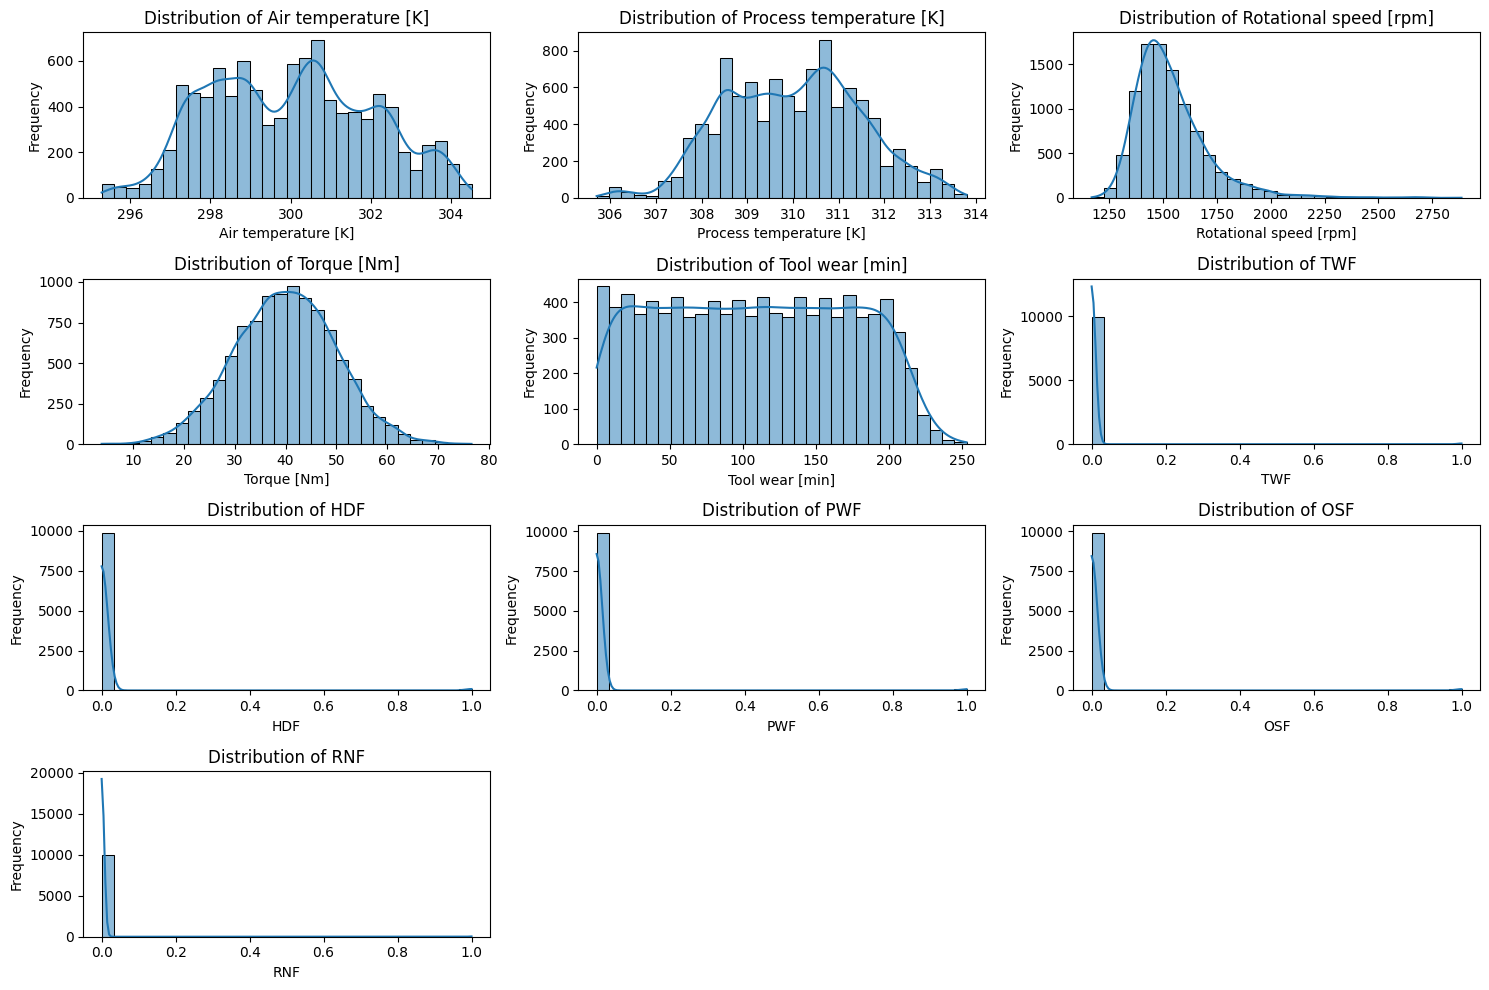

In [7]:
# Verificar la distribución de las variables numéricas

# Seleccionar columnas numéricas
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('UDI')  # Eliminando UDI ya que es solo un identificador
numerical_columns.remove('Machine failure')  # Eliminación de la variable objetivo para el análisis de distribución

# Ajustar la cuadrícula de la trama secundaria para acomodar todas las columnas numéricas
rows = len(numerical_columns) // 3 + (len(numerical_columns) % 3 > 0)  # Calcular el número requerido de filas

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

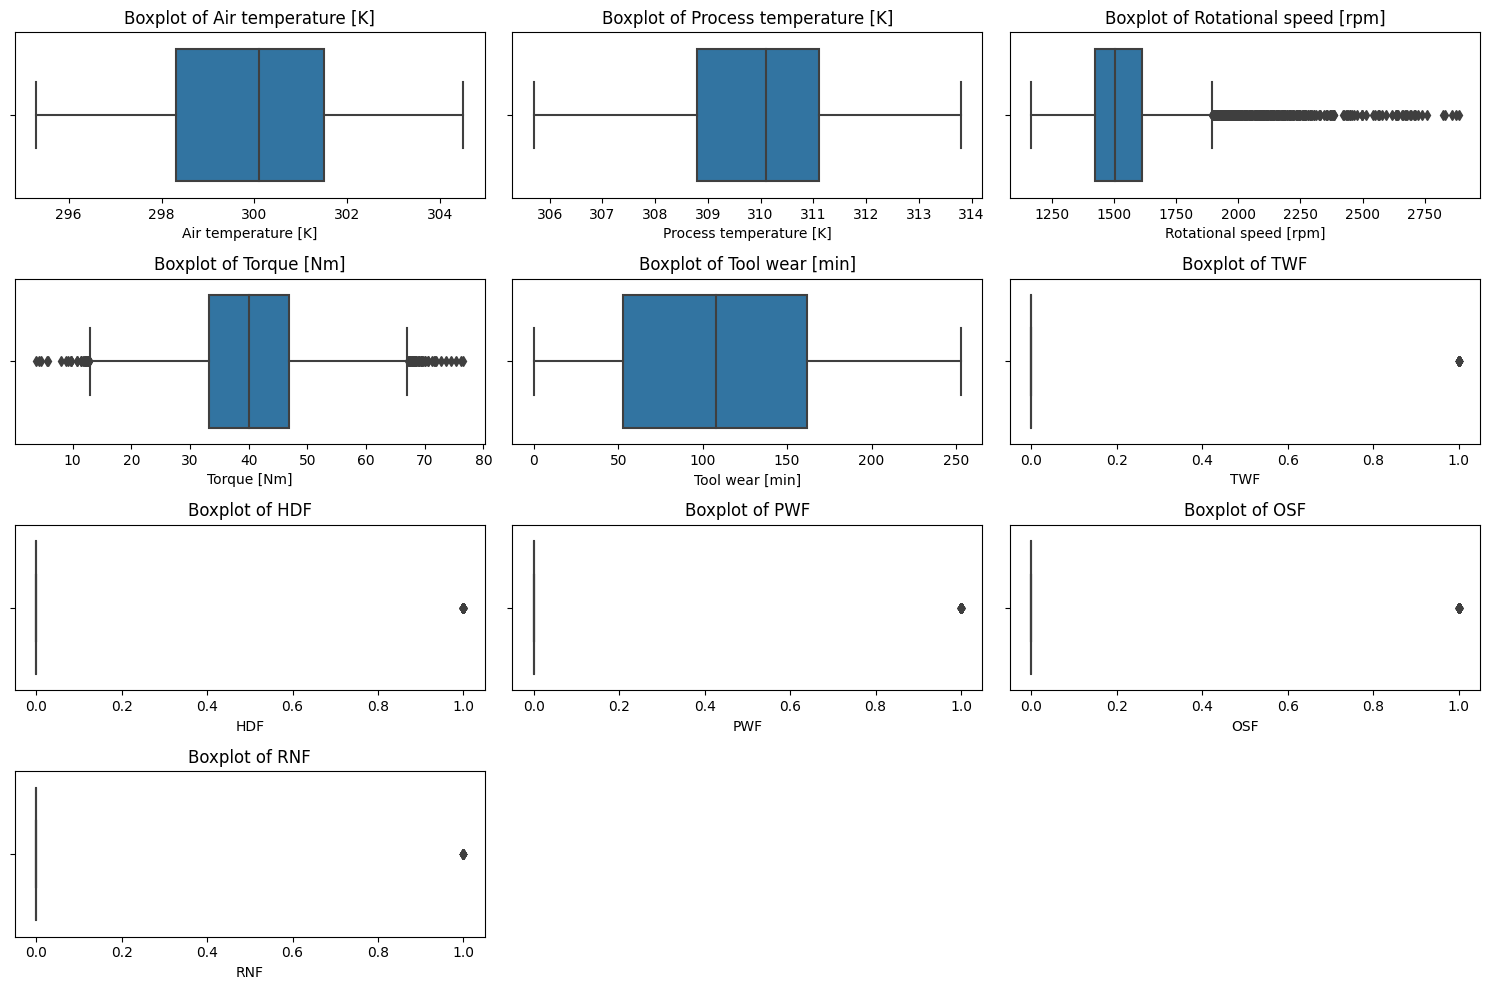

In [8]:
# Verificar valores Outliers

# Trazar diagramas de caja para columnas numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


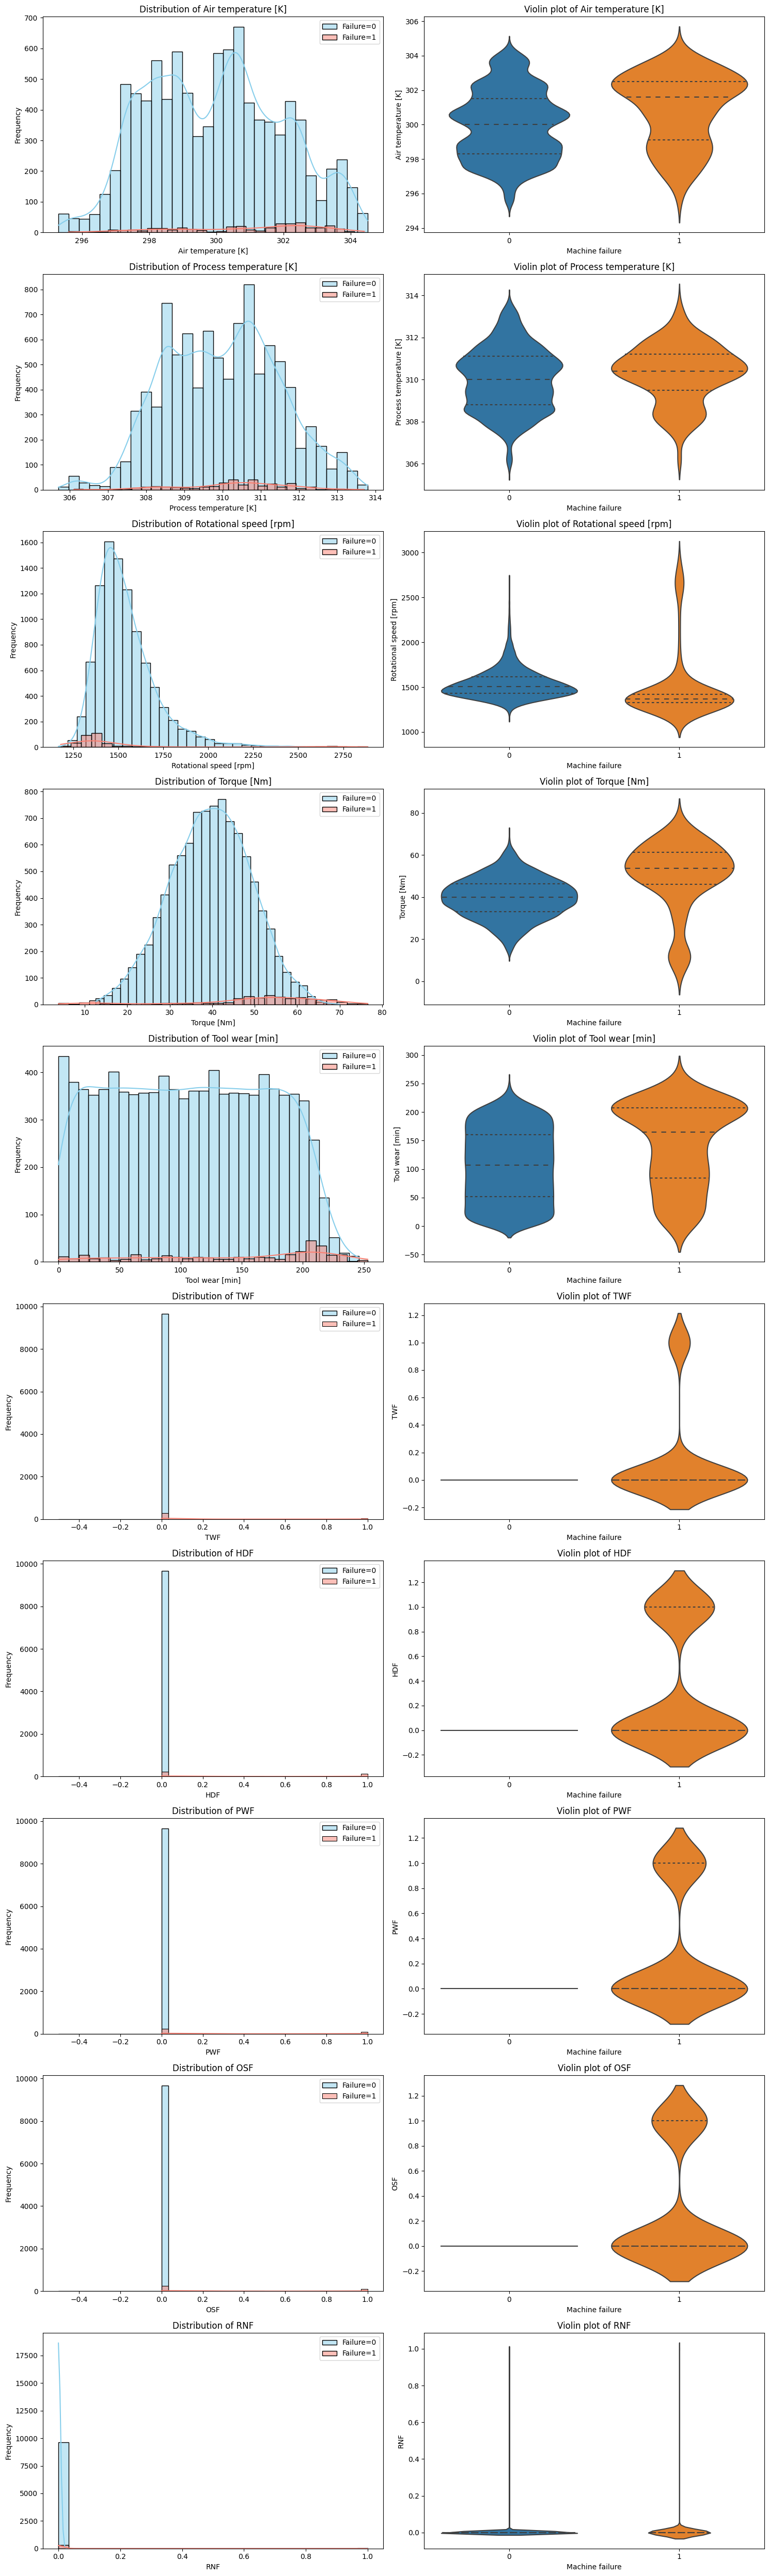

In [33]:
# Distribución de variables numéricas por Falla 1 y 0

# Seleccionar columnas numéricas
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('UDI')  # Eliminando UDI ya que es solo un identificador
numerical_columns.remove('Machine failure')  # Eliminación de la variable objetivo para el análisis de distribución

# Ajustar la cuadrícula de la trama secundaria para acomodar todas las columnas numéricas
rows = len(numerical_columns)  # Calcular el número requerido de filas para cada variable numérica

plt.figure(figsize=(15, 5 * rows))  # Ajustar el tamaño de la figura, 5 unidades de alto por cada fila
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, 2, 2 * i - 1)  # Subplot para el histograma
    sns.histplot(data[data['Machine failure'] == 0][col], kde=True, bins=30, color='skyblue', label='Failure=0')
    sns.histplot(data[data['Machine failure'] == 1][col], kde=True, bins=30, color='salmon', label='Failure=1')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(rows, 2, 2 * i)  # Subplot para el gráfico de violín
    sns.violinplot(x='Machine failure', y=col, data=data, inner='quartile')
    plt.title(f'Violin plot of {col}')
    plt.xlabel('Machine failure')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


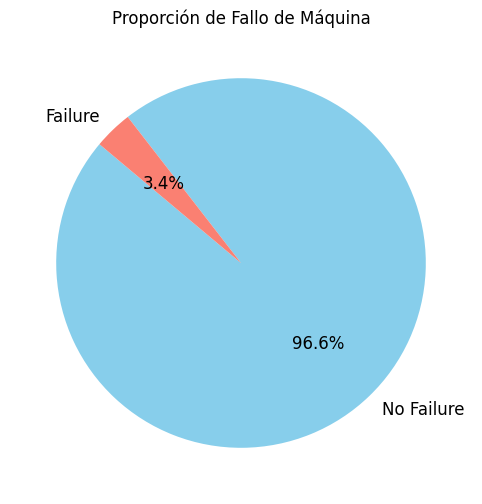

In [35]:
# Calcular la proporción de fallas
failure_proportion = data['Machine failure'].value_counts(normalize=True)

# Trazar el gráfico de torta
plt.figure(figsize=(8, 6))
ax = failure_proportion.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'],
                             labels=['No Failure', 'Failure'], textprops={'color': 'black', 'fontsize': 12})
plt.title('Proporción de Fallo de Máquina')
plt.ylabel('')  # Ocultar la etiqueta del eje y
plt.show()


In [9]:
# Seleccionar columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Obtener valores únicos para columnas categóricas
unique_values = {col: data[col].nunique() for col in categorical_columns}
unique_values

{'Product ID': 10000, 'Type': 3}

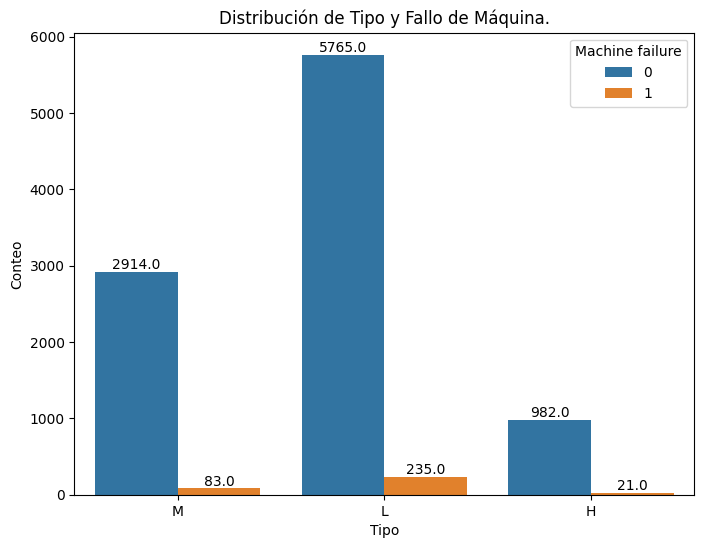

In [34]:
# Trazar la distribución de 'Tipo' y su relación con 'Fallo de máquina'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Type', hue='Machine failure', data=data)
plt.title('Distribución de Tipo y Fallo de Máquina.')
plt.xlabel('Tipo')
plt.ylabel('Conteo')

# Agregar etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [13]:
# Realizando One Hot Encoding

# Eliminando la columna 'ID de producto' ya que tiene valores únicos para cada fila
data_preprocessed = data.drop(columns=['Product ID'])

# Realizar codificación One-Hot en la columna 'Tipo'
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['Type'], drop_first=True)

data_preprocessed.head()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1,0
2,3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1,0
3,4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1,0
4,5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1,0


In [16]:
# Dividiendo la data en Train y Test

# Definición de las características (X) y el objetivo (y)
X = data_preprocessed.drop(columns=['UDI', 'Machine failure'])
y = data_preprocessed['Machine failure']

# Dividir los datos en conjuntos de entrenamiento y prueba. (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape

((8000, 12), (2000, 12))

In [18]:
# Identificar columnas numéricas a escala
numerical_columns_to_scale = numerical_columns.copy()
if 'UDI' in numerical_columns_to_scale:
    numerical_columns_to_scale.remove('UDI')  # Eliminando UDI tal como se eliminó
if 'Machine failure' in numerical_columns_to_scale:
    numerical_columns_to_scale.remove('Machine failure')  # Eliminando la variable de destino

# Inicializando el StandardScaler
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformar tanto el conjunto de entrenamiento como el de prueba.
X_train[numerical_columns_to_scale] = scaler.fit_transform(X_train[numerical_columns_to_scale])
X_test[numerical_columns_to_scale] = scaler.transform(X_test[numerical_columns_to_scale])

In [22]:
# Crear y entrenar el modelo de Random Forest

# Inicialización del modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenamiento del modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predicción y Evaluación del Modelo
# Predicción de los valores objetivo usando el modelo entrenado para el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Cálculo de métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir las métricas de rendimiento
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.999
F1 Score: 0.9850746268656716
Confusion Matrix:
[[1932    0]
 [   2   66]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [26]:
# Guardar el modelo entrenado en un archivo .pkl
filename = 'random_forest_model.pkl'
joblib.dump(rf_model, filename)  # Puedes cambiar rf_model por rf_model_optimized si optimizaste los parámetros

print(f'Model saved as {filename}')

Model saved as random_forest_model.pkl


In [31]:
# Obtener las variables más relevantes

# Getting feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Creating a DataFrame to hold the feature names and their corresponding importance values
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sorting the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

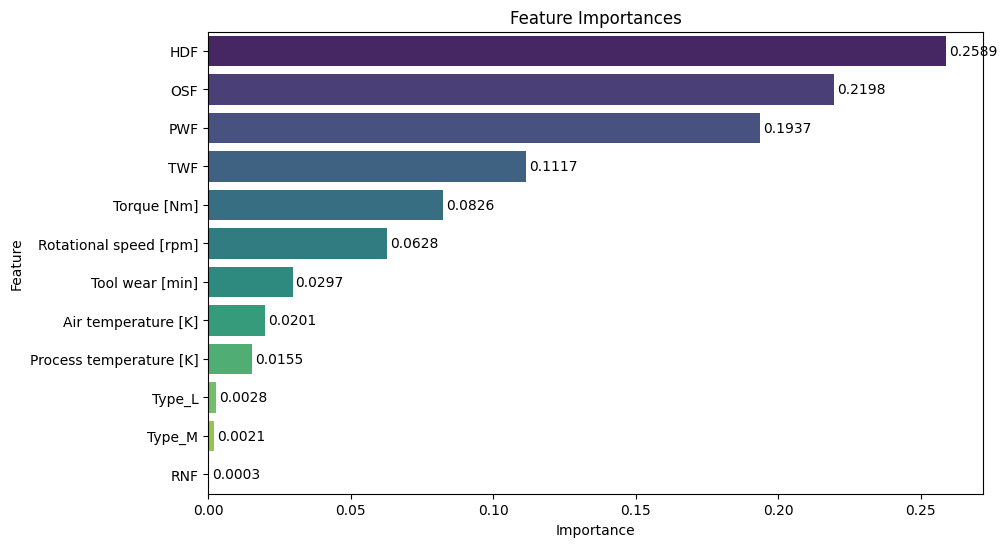

,Feature,Importance
6,HDF,0.258919
8,OSF,0.219757
7,PWF,0.193706
5,TWF,0.111718
3,Torque [Nm],0.082561
2,Rotational speed [rpm],0.062759
4,Tool wear [min],0.029699
0,Air temperature [K],0.020128
1,Process temperature [K],0.015485
10,Type_L,0.002830


In [32]:
# Plotting the feature importances with values on the bars
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Adding the importance values on the bars
for p in ax.patches:
    ax.annotate(f"{p.get_width():.4f}", (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(2, 0), textcoords='offset points')

plt.show()

# Returning the sorted features DataFrame for interpretation
features_df

#### Cargando data futura a predecir

In [36]:
# Tomar una muestra del DataFrame original (puedes especificar el tamaño de la muestra según lo necesites)
sample_data = data.sample(n=20, random_state=42)

In [37]:
# Preprocesar la muestra de la misma manera que el conjunto de entrenamiento
sample_data_preprocessed = sample_data.drop(columns=['Product ID', 'UDI'])  # Eliminar columnas no necesarias
sample_data_preprocessed = pd.get_dummies(sample_data_preprocessed, columns=['Type'], drop_first=True)  # One-Hot Encoding para 'Type'

# Extraer la variable objetivo y las características de la muestra
X_new = sample_data_preprocessed.drop(columns=['Machine failure'])
y_new = sample_data_preprocessed['Machine failure']

# Escalar las columnas numéricas
X_new[numerical_columns_to_scale] = scaler.transform(X_new[numerical_columns_to_scale])  # Utilizar el mismo scaler que se ajustó con los datos de entrenamiento


In [38]:
# Cargar el Modelo y Hacer Predicciones Futuras

# Cargar el modelo guardado
filename = 'random_forest_model.pkl'  # Asegúrate de que el nombre del archivo sea correcto y esté en el directorio correcto
loaded_model = joblib.load(filename)

# Hacer predicciones con el modelo cargado
y_pred_new = loaded_model.predict(X_new)

# Si quieres comparar las predicciones con los valores reales (si están disponibles)
print(classification_report(y_new, y_pred_new))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

